In [1]:
import pandas as pd
import pandasql
from pandasql import sqldf

The purpose of this Jupyter Notebook is to showcase my skills in SQL in a clear, presentable manner on Github. My method in doing this was by running queries from a public dataset that would give valuable insight to the data. 

By using the python package, **pandassql**, I was able to run SQL queries from CSV files by running the query as a string, and as a parameter for the *sqldf* function.

Since I was using a public dataset and not a database, I was limited in my opportunites to use JOINS in my query. However, I did make good use of INNER JOINs in some situations (See the 2. Intermediate section).

The dataset was taken from https://ourworldindata.org/ and their github repository https://github.com/owid/covid-19-data/tree/master/public/data, where they provide a complete COVID-19 dataset whose data sources range from JHU to the European CDC. The dates range from 2020-01-01 to 2021-02-03.  

In [2]:
# Save the csv to a pandas dataframe
df_covid = pd.read_csv('owid-covid-data.csv')

In [3]:
# 59 columns and 66,569 rows
df_covid.shape

(66569, 59)

In [4]:
# Each row specifies a specific location and date. 
df_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


Moving forward, I wrote my queries with the goal of showing a wide variety of applications, from beginner concepts like conditional operators to more advanced topics like window functions.

1. Beginner (Conditional operators, WHERE, LIKE, IN, BETWEEN, NULL, MATH)
    - Find all rows where the location starts with the letter 'B'
    - Find the total number of vaccinations administered thus far in North America during the year 2021
    - Find the number of people that were 65 and over in South America during the last day of 2020, 
        - This is assuming the *aged_65_older* is up to date in 2020 as described in the data dictionary  


2. Intermediate (Aggregate functions, GROUP BY, DISTINCT, JOIN, Subqueries, Data Types)
    - How many continents are included in this dataset? 
    - How many locations were included in each continent? (We look deeper into this!)
    - Write a query showing the first day in which all locations in Asia had their first doses of vaccines administered.
        - Include the number of doses administered.
    
    
3. Advanced (Window Functions)
    - Make a sample daily report showing number of 1) vaccinations, 2) new cases, 3) new ICU patients, grouped by continents for a given month
        - Include the the running totals of new cases and new vaccinations administered
        - Include a column showing the monthly average number of ICU patients

In [5]:
# For the *sqldf* function to function, and name of the df being used is what should follow the FROM clause.

# Find all rows where the location starts with the letter 'B'.

pandasql.sqldf("""
               SELECT 
                *
               FROM df_covid
                WHERE location LIKE 'B%'
               LIMIT 10;
               """, globals())

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,BHS,North America,Bahamas,2020-03-16,1.0,1.0,NaN,None,None,NaN,...,27717.847,None,235.954,13.17,3.1,20.4,None,2.9,73.92,0.807
1,BHS,North America,Bahamas,2020-03-17,1.0,0.0,NaN,None,None,NaN,...,27717.847,None,235.954,13.17,3.1,20.4,None,2.9,73.92,0.807
2,BHS,North America,Bahamas,2020-03-18,1.0,0.0,NaN,None,None,NaN,...,27717.847,None,235.954,13.17,3.1,20.4,None,2.9,73.92,0.807
3,BHS,North America,Bahamas,2020-03-19,3.0,2.0,NaN,None,None,NaN,...,27717.847,None,235.954,13.17,3.1,20.4,None,2.9,73.92,0.807
4,BHS,North America,Bahamas,2020-03-20,3.0,0.0,NaN,None,None,NaN,...,27717.847,None,235.954,13.17,3.1,20.4,None,2.9,73.92,0.807
5,BHS,North America,Bahamas,2020-03-21,4.0,1.0,0.571,None,None,0.0,...,27717.847,None,235.954,13.17,3.1,20.4,None,2.9,73.92,0.807
6,BHS,North America,Bahamas,2020-03-22,4.0,0.0,0.571,None,None,0.0,...,27717.847,None,235.954,13.17,3.1,20.4,None,2.9,73.92,0.807
7,BHS,North America,Bahamas,2020-03-23,4.0,0.0,0.429,None,None,0.0,...,27717.847,None,235.954,13.17,3.1,20.4,None,2.9,73.92,0.807
8,BHS,North America,Bahamas,2020-03-24,5.0,1.0,0.571,None,None,0.0,...,27717.847,None,235.954,13.17,3.1,20.4,None,2.9,73.92,0.807
9,BHS,North America,Bahamas,2020-03-25,5.0,0.0,0.571,None,None,0.0,...,27717.847,None,235.954,13.17,3.1,20.4,None,2.9,73.92,0.807


In [6]:
# Find the total number of vaccinations administered in North America during the year 2021.
# Reminder: the figure below would represent as of 2021-02-03
pandasql.sqldf("""
               SELECT 
                SUM(new_vaccinations) as total_vaccinations_2021_NA
               FROM df_covid
                WHERE continent = 'North America'
                AND strftime('%Y',date) = '2021';
               """, globals())

,total_vaccinations_2021_NA
0,24800765.0


In [7]:
# Find the number of people that were 65 and over in South America during the last day of 2020.
# This is assuming the *aged_65_older* column is up to date in 2020 as described in the data dictionary.
pandasql.sqldf("""
               SELECT
                CAST (SUM(population_65plus) AS INT) total_population_65plus_SA
               FROM 
                (SELECT 
                  population * (aged_65_older / 100) as population_65plus
                 FROM df_covid
                  WHERE continent = 'South America'
                  AND date = '2020-12-31');
               """, globals())

,total_population_65plus_SA
0,36569901


In [8]:
# How many continents are included in this dataset?
pandasql.sqldf("""
               SELECT 
                COUNT(DISTINCT continent) as num_continents
               FROM df_covid
               ;
               """, globals())

,num_continents
0,6


In [9]:
pandasql.sqldf("""
               SELECT 
                DISTINCT continent as num_continents
               FROM df_covid
               ;
               """, globals())

,num_continents
0,Asia
1,None
2,Europe
3,Africa
4,North America
5,South America
6,Oceania


In [10]:
# How many locations were included in each continent?

pandasql.sqldf("""
               SELECT
                continent,
                COUNT(location)
               FROM df_covid
               GROUP BY 1
               ;
               """, globals())

,continent,COUNT(location)
0,None,3337
1,Africa,17545
2,Asia,16047
3,Europe,16065
4,North America,7698
5,Oceania,1801
6,South America,4076


In [11]:
# This is interesting! There are 3337 rows that have no data for the *continent* field.
# What are the unique location fields for rows where *continent* is null?

pandasql.sqldf("""
               SELECT
                DISTINCT location
               FROM df_covid 
                WHERE continent IS NULL
               ;
               """, globals())

,location
0,Africa
1,Asia
2,Europe
3,European Union
4,International
5,North America
6,Oceania
7,South America
8,World


The results above indicate that this dataset sometimes uses the *location* column to specify the continent. If the goal were to perform EDA at the continent level, one remedy could be to set the null *continent* values equal to their respective *location* values. For now however, we will move on.

In [12]:
# Write a query showing the first day in which all locations in Asia had their first doses of vaccines administered.
# Include the number of doses administered.
pandasql.sqldf("""
               SELECT 
                df_covid.location,
                df_covid.date as date_of_first_doses,
                df_covid.new_vaccinations
               FROM df_covid
               INNER JOIN
               (SELECT
                 location,
                 MIN(date) as date
                FROM df_covid 
                 WHERE continent = 'Asia'
                 AND new_vaccinations IS NOT NULL
               GROUP BY 1) first_dates 
                ON first_dates.location = df_covid.location
                AND first_dates.date = df_covid.date
               ORDER BY df_covid.date;
               """, globals())

,location,date_of_first_doses,new_vaccinations
0,Israel,2020-12-20,7313.0
1,Bahrain,2020-12-24,11106.0
2,Oman,2020-12-29,1646.0
3,Saudi Arabia,2021-01-07,37862.0
4,United Arab Emirates,2021-01-08,53859.0
5,Singapore,2021-01-12,2800.0
6,Turkey,2021-01-14,279452.0
7,India,2021-01-16,191181.0
8,Indonesia,2021-01-25,12717.0
9,Bangladesh,2021-01-27,26.0


In [15]:
# Advanced (Window Functions)

# Make a sample daily report showing number of 1) vaccinations, 2) new cases, 3) new ICU patients, 
# grouped by continents for a given month.
    # Include the the running totals of new cases and new vaccinations administered.
    # Include a column showing the monthly average number of ICU patients.

pandasql.sqldf("""
               SELECT 
                europe.*,
                SUM(daily_new_vaccinations) OVER (ORDER BY date) AS running_total_new_vac,
                SUM(daily_new_cases) OVER (ORDER BY date) AS running_total_daily_new_cases,
                AVG(current_icu_patients) OVER () AS running_total_current_icu_patients
               FROM
               (SELECT
                date,
                continent,
                SUM(COALESCE(new_vaccinations, 0)) AS daily_new_vaccinations,
                SUM(COALESCE(new_cases, 0)) AS daily_new_cases,
                SUM(COALESCE(icu_patients, 0)) AS current_icu_patients
               FROM df_covid
                WHERE strftime('%Y',date) = '2021'
                AND strftime('%m',date) = '01'
                AND continent = 'Europe'
               GROUP BY 1, 2
               ORDER BY 1, 2) europe;
               """, globals())

PandaSQLException: (sqlite3.OperationalError) near "(": syntax error [SQL: "\n               SELECT \n                europe.*,\n                SUM(daily_new_vaccinations) OVER (ORDER BY date) AS running_total_new_vac,\n                SUM(daily_new_cases) OVER (ORDER BY date) AS running_total_daily_new_cases,\n                AVG(current_icu_patients) OVER () AS running_total_current_icu_patients\n               FROM\n               (SELECT\n                date,\n                continent,\n                SUM(COALESCE(new_vaccinations, 0)) AS daily_new_vaccinations,\n                SUM(COALESCE(new_cases, 0)) AS daily_new_cases,\n                SUM(COALESCE(icu_patients, 0)) AS current_icu_patients\n               FROM df_covid\n                WHERE strftime('%Y',date) = '2021'\n                AND strftime('%m',date) = '01'\n                AND continent = 'Europe'\n               GROUP BY 1, 2\n               ORDER BY 1, 2) europe;\n               "] (Background on this error at: http://sqlalche.me/e/e3q8)

The function above gives an error claiming to have a syntax error, even though I'm confident there is none. After further investigating this, I believe the real reason behind this error is related to the fact that the *pandasql* package used Sqlite's syntax, and their most recent update was back in 2016 (1), when Sqlite did not support window functions (until 2018 (2)). In other words, *pandasql* does not have window function funtionality.

Since window functions are an important skill to be able to apply and present, my solution to this will be to write down and share a sample query from a different dataset through using Google BigQuery  

(1) https://pypi.org/project/pandasql/
(2) https://www.sqlite.org/releaselog/3_25_0.html

Just to give a quick background on this new dataset that I used, it is another public dataset from BigQuery, originally sourced from https://github.com/open-covid-19/data. The data structure was similar to that of the original dataset I used, displaying a date and location per row, expect it focused on areas in North America.

For the following query, I focused on Sweetwater County in Wyoming, and wanted to generate a monthly report showing:

- Date
- State code
- Newly confirmed COVID cases
- Running total of newly confirmed COVID cases
- Monthly Average of newly confirmed COVID cases
    - Since I only focused on one state, the OVER clause did not need any additional parameters. If this report did include multiple states and I wanted the monthly average per state, I would write *OVER(PARTITION BY subregion1_code)*
- Newly deceased COVID cases
- Running total of newly deceased COVID cases
- COVID diagnostic tests performed
- Running total of COVID diagnostic tests performed

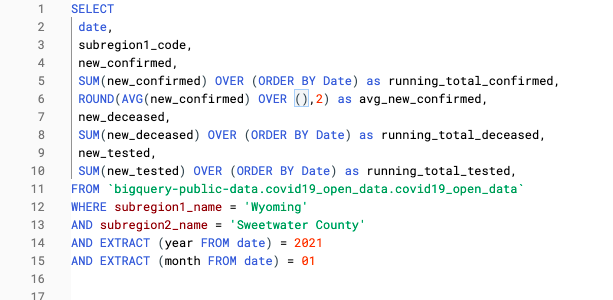

In [13]:
from IPython.display import Image
Image(filename='SQL_window_input.png', width=600, height=600)

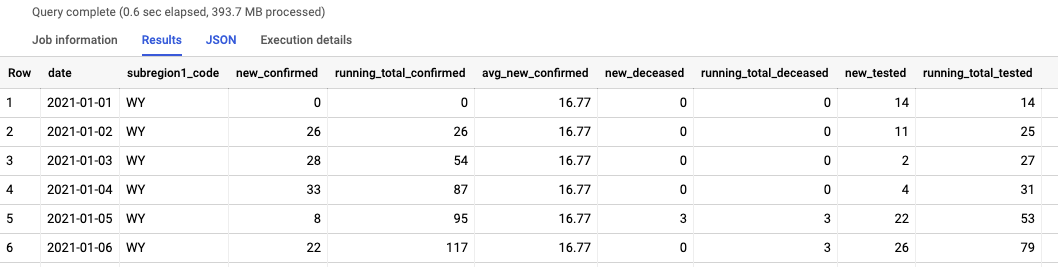

In [14]:
Image(filename='SQL_window_output.png', width=1000, height=1000)